# 1. 使用Python实现感知机算法

### 1.1 导入库

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import seed

### 1.2 实现

使用面向对象的编程思想，定义一个感知机接口作为Python类，类中的方法主要有初始化方法，fit方法和predict方法。

In [2]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta # Learning rate (between 0.0 and 1.0)
        self.n_iter = n_iter # Passes over the training dataset.
        
    def fit(self, X, y):
        """Fit training data."""
        self.w_ = np.zeros(1 + X.shape[1]) # w0, w1, w2, ..., wn
        self.errors_ = [] # Numebr of misclassifications in every epoch.
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

有了以上的代码实现，我们可以初始化一个新的Perceptron对象，并且对学习率eta和迭代次数n_iter赋值，fit方法先对权重参数初始化，然后对训练集中每一个样本循环，根据感知机算法对权重进行更新。类别通过predict方法进行预测。除此之外，self.errors_ 还记录了每一轮中误分类的样本数，有助于接下来我们分析感知机的训练过程。

### 1.3 基于Iris数据集训练感知机模型

我们使用Eirs数据集检验上面的感知机代码，由于我们实现的是一个二分类感知机算法，所以我们仅使用Iris中Setosa和Versicolor两种花的数据。为了简便，我们仅使用sepal length和petal length两维度的特征。记住，感知机模型不局限于二分类问题，可以用通过One-vs-All技巧扩展到多分类问题。

**One-vs-All(OvA)**有时也被称为**One-vs-Rest(OvR)**，是一种常用的将二分类分类器扩展为多分类分类器的技巧。通过OvA技巧，我们为每一个类别训练一个分类器，此时，对应类别为正类，其余所有类别为负类。对新样本数据进行类别预测时，我们使用训练好的所有类别模型对其预测，将具有最高置信度的类别作为最后的结果。对于感知机来说，最高置信度指的是网络输入z绝对值最大的那个类别。

我们使用pandas读取数据，然后通过pandas中的tail方法输出最后五行数据，看一下Iris数据集格式:

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)  
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)  
X = df.iloc[0:100, [0,2]].values

然后用散点图对数据进行可视化

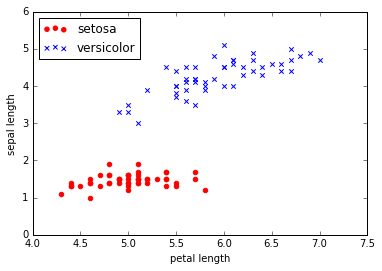

In [5]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

现在开始训练我们的感知机模型:

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

为了更好地了解感知机训练过程，我们将每一轮的误分类数目可视化出来，检查算法是否收敛和找到分界线：

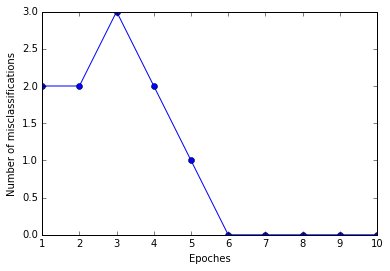

In [7]:
# plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.plot(range(1, ppn.n_iter + 1), ppn.errors_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('Number of misclassifications')
plt.show()

通过上图我们可以发现，第6次迭代时，感知机算法已经收敛了，対训练集的预测准群率是100%。接下来我们将分界线画出来：

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_region(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker = markers[idx], label=cl)

<function matplotlib.pyplot.show>

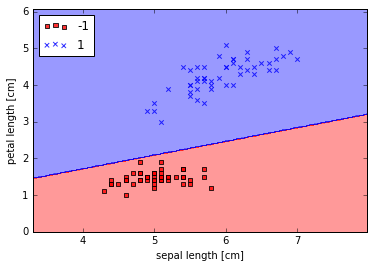

In [9]:
plot_decision_region(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show

虽然对于Iris数据集，感知机算法表现的很完美，但是"收敛"一直是感知机算法中的一大问题。Frank Rosenblatt从数学上证明了只要两个类别能够被一个现行超平面分开，则感知机算法一定能够收敛。然而，如果数据**并非线性可分**，感知计算法则会一直运行下去，除非我们人为设置最大迭代次数n_iter。

# 2 通过scikit-learn训练感知机模型

我们先看一下如何使用sklearn训练一个感知机模型，数据集还是用我们熟悉的Iris数据集。为了可视化方便，我们只使用其中两维度特征，样本数则使用三个类别全部的150个样本。

### 2.1 导入库

In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets

### 2.2 加载数据、数据预处理

In [2]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

为了评估训练好的模型对新数据的预测能力，我们先把Iris训练集分割为两部分：训练集和测试集。

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

通过调用train_tset_split方法我们将数据集随机分为两部分，测试集占30%(45个样本)，训练集占70%(105个样本)。

直接调用sklearn中的StandardScaler来对特征进行标准化：

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # 对训练集中每一维度特征计算出样本平均值和标准差
X_train_std = sc.transform(X_train) # 调用transform方法对数据集进行标准化
X_test_std = sc.transform(X_test) # 我们用相同的标准化参数对待训练集和测试集

对数据标准化以后，我们可以训练一个感知机模型。sklearn中大多数算法都支持多类别分类，默认使用One-vs.-Rest方式实现。所以我们可以直接训练三分类的感知机模型:



In [5]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

训练好感知机模型后，我们可以使用predict方法进行预测了：

In [6]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


对于测试集中45个样本，有4个样本被错分类了

sklearn中包含了许多评价指标，这些指标都位于metrics模块，比如，我们可以计算分类准确率:

In [7]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Accuracy: 0.91


画出分界区域:

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, slpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='o',
                    s=55, label='test set')

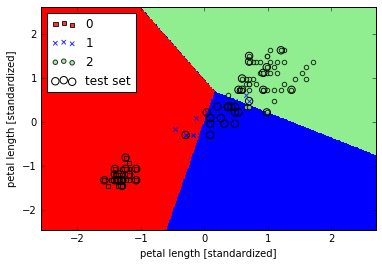

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

对结果可视化后，我们可以发现三个类别的花不能被线性决策界完美分类

感知机对于不能够线性可分的数据，算法永远不会收敛，这也是为什么我们不推荐大家实际使用感知机的原因。